In [1]:
import sys
sys.path.append("..")

from methods.dcbo import DynCausalBayesOpt
from utils.sequential_sampling import draw_samples_from_sem_dev
from causal_graph.example_dyn_graphs import three_step_stat
from sem.stationary import StationaryModel_dev
from collections import OrderedDict
from utils.costs import equal_cost
import matplotlib.pyplot as plt

In [2]:
dyn_graph = three_step_stat()
sem_model = StationaryModel_dev()
D_obs = draw_samples_from_sem_dev(sem_model, 20, 2, seed=11)
intervention_ini = {
    "X": [-3.6],
    "Z": [None],
    "Y": [None],
}
D_intervene_ini_x = draw_samples_from_sem_dev(
    sem_model, 1, 0, intervention=intervention_ini, epsilon=0.0
)
intervention_ini = {
    "X": [None],
    "Z": [12.5],
    "Y": [None],
}
D_intervene_ini_z = draw_samples_from_sem_dev(
    sem_model, 1, 0, intervention=intervention_ini, epsilon=0.0
)
D_intervene_ini = OrderedDict(
    [(("X",), D_intervene_ini_x), (("Z",), D_intervene_ini_z)]
)
intervention_domain = OrderedDict([("X", [-5.0, 5.0]), ("Z", [-5.0, 20.0])])
num_trials = 20
task = "min"
cost_fn = equal_cost
num_anchor_points = 100
num_monte_carlo = 20
jitter = 1e-6
dcbo = DynCausalBayesOpt(
    dyn_graph,
    sem_model,
    D_obs,
    D_intervene_ini,
    intervention_domain,
    num_trials,
    task,
    cost_fn,
    num_anchor_points,
    num_monte_carlo,
    jitter,
)

In [3]:
opt_history = dcbo.run()

Dynamic causal Bayesian optimization at time step 0 is started.
Temporal index: 0
Trial: 0
Intervened exploration set: ('Z',)
Intervention point: [[1.3040285]]
Target variable value: -0.6732638
Optimal value: -0.6732638
Temporal index: 0
Trial: 1
Intervened exploration set: ('Z',)
Intervention point: [[18.008987]]
Target variable value: 0.2606524
Optimal value: -0.6732638
Temporal index: 0
Trial: 2
Intervened exploration set: ('X',)
Intervention point: [[-4.955782]]
Target variable value: -0.81358564
Optimal value: -0.81358564
Temporal index: 0
Trial: 3
Intervened exploration set: ('Z',)
Intervention point: [[-4.6698737]]
Target variable value: -1.3055073
Optimal value: -1.3055073
Temporal index: 0
Trial: 4
Intervened exploration set: ('X',)
Intervention point: [[-4.5931697]]
Target variable value: -0.15960258
Optimal value: -1.3055073
Temporal index: 0
Trial: 5
Intervened exploration set: ('X',)
Intervention point: [[-4.624703]]
Target variable value: 0.122823074
Optimal value: -1.305

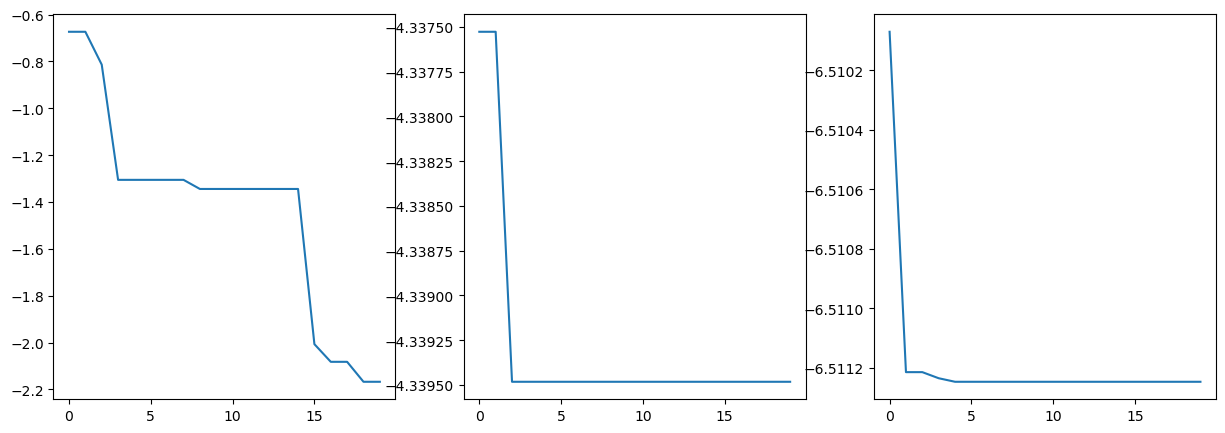

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].plot(opt_history[i])
plt.show()